## Algoritmus k-najbližších susedov (KNN) a zhlukovanie (Clustering)

V tomto notebooku sa naučíme o:
- **Algoritmus k-najbližších susedov - KNN** – ide o algoritmus učenia pod dohľadom (supervised learning), ktorý robí predpovede pre nový dátový bod na základe najbližších bodov v priestore, predpokladá, že body, ktoré sú si blízke, majú podobné vlastnosti
- **Zhlukovanie - Clustering** – ide o prístup učenia bez dohľadu (unsupervised learning), ktorý hľadá prirodzené zoskupenia v dátach a odhaľuje vzory a vzťahy bez potreby vopred definovaných tried alebo označení

---

### Praktický príklad pre tieto algoritmy

#### Klasifikácia objektov do tried

- aplikujeme **KNN** a **Clustering** na klasifikáciu objektov na základe ich vlastností 
- na výber budú 2 datasety - druhy kvetov a druhy vína
- pre vizualizáciu a zjednodušenie budeme používať len 2 vlastnosti objektov - 2D priestor
- datasety obsahujú 3 triedy objektov

---

In [58]:
# Importovanie

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris, load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, adjusted_rand_score, silhouette_score

In [59]:
# Načítanie dát pre modely

data = load_iris()  #load_iris() load_wine()
X = data.data[:, :2]
y = data.target
target_names = data.target_names
print(f"Number of samples: {X.shape[0]}")

Number of samples: 150


---

## KNN
- **Princíp**: algoritmus klasifikuje nové dátové body na základe väčšinovej triedy ich **k** najbližších susedov v priestore
- **Miera vzdialenosti**: podobnosť medzi dátovými bodmi sa určuje pomocou metrík, ako je Euklidovská alebo Manhattanská vzdialenosť
- **Parameter k**: určuje, koľko susedov sa zohľadňuje pri rozhodovaní — malé k robí model citlivým na šum, zatiaľ čo veľké k môže príliš vyhladiť hranice medzi triedami
- **Predikcia**: pri predpovedi nového vstupu algoritmus vyhľadá **k** najbližších vzoriek z dát a priradí triedu, ktorá sa medzi nimi vyskytuje najčastejšie
- **Proces učenia**: nevykonáva žiadne explicitné učenie - iba uchováva dáta a predpovede robí na základe ich blízkosti — preto sa označuje ako „lenivé učenie“

---

In [60]:
# Rozdelenie dát na trénovaciu a testovaciu množinu

trainSize = int(input("Koľko % z dát má model použiť na tréning? -> Zvyšok bude použitý na test.  "))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - (trainSize/100), random_state=42)

Koľko % z dát má model použiť na tréning? -> Zvyšok bude použitý na test.   80


In [61]:
# Nastavenie parametra K

k = int(input("Hodnota K:"))

Hodnota K: 3


In [66]:
# Trénovanie modelu

model = KNeighborsClassifier(
    n_neighbors=k,
    metric='euclidean',  # 'euclidean' 'manhattan'
    weights='uniform'  # 'distance' 'uniform' 
)
model.fit(X_train, y_train)

# Testovanie modelu
y_pred = model.predict(X_test)

---

### Interpretácia výsledkov KNN
#### Na interpretáciu využijeme
- presnosť
- matica zámen
- rozhodovacie hranice

---

#### Presnosť
- vyjadruje ako presne model dokázal klasifikovať vzorky do tried
- rozsah od 0 do 1, pričom 1 znamená úplnú presnosť

In [67]:
acc = accuracy_score(y_test, y_pred)
print(f"Presnosť: {acc:.4f}")

Presnosť: 0.7667


---

#### Matica zámen
- matica zámen zobrazuje počty správnych a nesprávnych predikcií pre jednotlivé triedy
- najväčšie čísla na diagonále znamenajú lepšiu presnosť modelu
- takisto je možné zistiť, ktoré triedy si model najčastejšie zamieňal medzi sebou, ako aj ktoré triedy dokázal rozpoznávať najpresnejšie

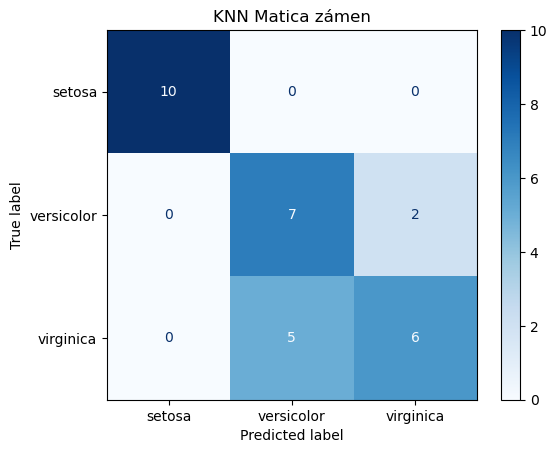

In [68]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Matica zámen")
plt.show()

---

#### Rozhodovacie hranice
- zobrazujú, ako model rozdeľuje priestor vstupných údajov medzi jednotlivé triedy, teda kde presne prechádza hranica medzi oblasťami tried

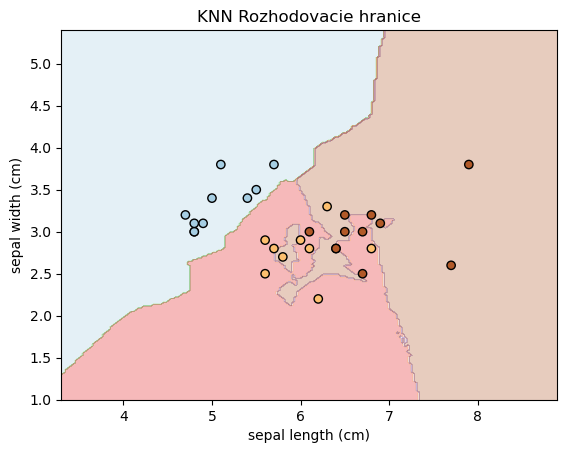

In [69]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("KNN Rozhodovacie hranice")
plt.show()

---

## Klastrovanie

- **Princíp**: je technika učenia bez dohľadu, pri ktorej má model prístup len k vstupným dátam, bez vopred definovaných výstupných tried alebo označení
- **Cieľ**: rozdeliť dáta do skupín - zhlukov tak, aby objekty v rámci jedného zhluku boli čo najpodobnejšie a objekty v rôznych zhlukoch čo najodlišnejšie
- **Definícia zhluku**: každý zhluk predstavuje skupinu dátových bodov, ktoré majú spoločné vlastnosti alebo sú si blízke v priestore
- **Segmentácia dát**: zhlukovanie pomáha odhaliť vzory alebo štruktúry v dátach a poskytuje pohľad na ich prirodzené usporiadanie
- **Metódy klastrovania**: Na zhlukovanie existuje viacero prístupov a algoritmov — napríklad centroidové metódy ako **K-Means**, hustotné metódy ako **DBSCAN**, hierarchické prístupy alebo modelové metódy, ktoré sa líšia spôsobom, akým zhluky v dátach hľadajú

### K-Means
- pre klasifikáciu objektov použijeme K-Means, pretože datasety obsahujú pomerne dobre oddelené zhluky, pre ktoré je tento algoritmus vhodný a poskytuje prehľadné výsledky

---

In [71]:
# Nastavenie parametra počet zhlukov

n = int(input("Počet zhlukov:"))

Počet zhlukov: 3


In [72]:
# Spustenie modelu

kmeans = KMeans(n_clusters=n, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.labels_

---

### Interpretácia výsledkov modelu
#### Na interpretáciu využijeme
- ARI
- Silhouette Score
- Vizualizáciu centroidov s prislúchajúcimi bodmi

---

#### ARI
- adjusted rand index - vyčísluje zhodu medzi skutočnými triedami a priradenými klastrami

In [73]:
ari = adjusted_rand_score(y, y_kmeans)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Adjusted Rand Index (ARI): 0.6007


---

#### Silhouette Score
- meria, ako blízko sú body k svojmu klastru v porovnaní s ostatnými - hodnotí len vnútornú kvalitu zhlukov.

In [74]:
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.4451


---

#### Vizualizáciu centroidov s prislúchajúcimi bodmi
- ako K-Means rozdelil priestor, kde sú centroidy klastrov, a či sú klastre dobre oddelené alebo sa prekrývajú

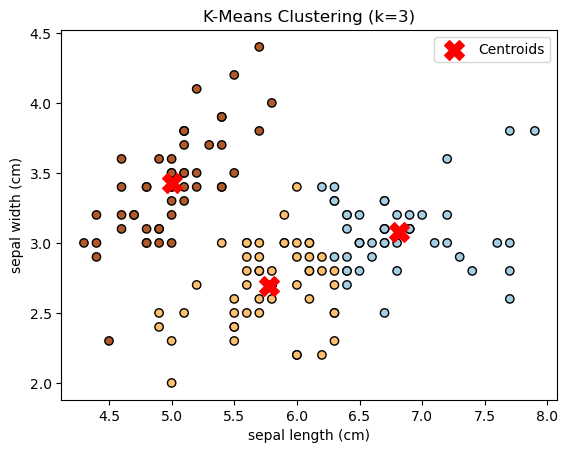

In [75]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap=plt.cm.Paired, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("K-Means Clustering (k=3)")
plt.legend()
plt.show()